**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to 
        improve a machine learning model's performance and efficiency. 
        Instead of using all the features, we select only the most relevant ones that contribute significantly to prediction
        

**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 
**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 

<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# Set seed for reproducibility
np.random.seed(42)

# Create the DataFrame
data = pd.DataFrame({
    'size': np.random.randint(1000, 5000, 100),  # Fixed randint
    'bedrooms': np.random.randint(1, 5, 100),
    'age': np.random.randint(1, 50, 100),
    'price': np.random.randint(100000, 500000, 100)
})

# Display the first 5 rows
print(data.head())


   size  bedrooms  age   price
0  4174         2   32  486393
1  4507         2   39  134754
2  1860         4   49  326814
3  2294         2   32  337714
4  2130         2    4  242483


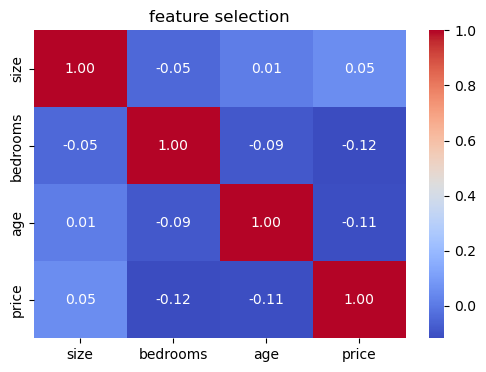

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("feature selection")
plt.show()

In [14]:
#3.apply recursuive feature elimination(wrapper method)
x=data.drop(columns=['price'])#feature
y=data['price']#target var
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)#select top 2 features
x_selected=rfe.fit_transform(x,y)

print("selcted features using rfe:",x.columns[rfe.support_])
#apply rfe to selct top 2 important features


selcted features using rfe: Index(['size', 'age'], dtype='object')


In [15]:
#4.apply lasso reg
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)
imp=np.abs(lasso.coef_)
#display feature importance
sel_feature=x.columns[imp>0]
print("selcted features using lasso:",sel_feature)
#apply lasso to eliminate irrelevant features

selcted features using lasso: Index(['size', 'bedrooms', 'age'], dtype='object')
